In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

### Using Colab (linked to Github):


In [3]:
# Mount Google Drive.
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
# ! pip install -q kaggle
# from google.colab import files
# files.upload()

In [5]:
# !rm -r /content/drive/MyDrive/kaggle
# !mkdir /content/drive/MyDrive/kaggle
# !mv ./kaggle.json /content/drive/MyDrive/kaggle/
# !chmod 600 /content/drive/MyDrive/kaggle/kaggle.json

In [6]:
# print("Files:")
# for dirname, _, filenames in os.walk('.'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [7]:
# API command of the dataset:
#!kaggle datasets download -d alexteboul/diabetes-health-indicators-dataset

In [8]:
# open the zip file in read mode
# !cp ./diabetes-health-indicators-dataset.zip /content/drive/MyDrive/csvs/diabetes-health-indicators-dataset.zip
# !unzip -q /content/drive/MyDrive/csvs/diabetes-health-indicators-dataset.zip -d /content/drive/MyDrive/csvs
# !rm /content/drive/MyDrive/csvs/diabetes-health-indicators-dataset.zip

In [9]:
# Use the desired dataset and remove the other 2:
df = pd.read_csv('/content/drive/MyDrive/csvs/diabetes_012_health_indicators_BRFSS2015.csv')
#!rm /content/drive/MyDrive/csvs/diabetes_binary_health_indicators_BRFSS2015.csv
#!rm /content/drive/MyDrive/csvs/diabetes_binary_5050split_health_indicators_BRFSS2015.csv

### Using Kaggle (linked with Github):
https://www.kaggle.com/discussions/general/74235

In [10]:
# print("Available datasets:")
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [11]:
# df = pd.read_csv('/kaggle/input/diabetes-health-indicators-dataset/diabetes_012_health_indicators_BRFSS2015.csv')

# Data understanding:
Questions that one might ask based on this dataset:

# Data preprocessing:

In [12]:
df.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


## Data cleaning:

### Dealing with impossible and missing values:

Because the dataset is clean and complete (no missing values, no impossible values, no bad formatting), no further preprocessing of data is neccessary in this regards.

In [13]:
print("MISSING VALUES FOR EACH VARIABLE:\n",df.isnull().sum(), "\n")
print("SHAPE OF THE DATASET:", df.shape)

MISSING VALUES FOR EACH VARIABLE:
 Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64 

SHAPE OF THE DATASET: (253680, 22)


#### NUMERICAL FEATURES:
Out of the 22 columns of the dataset, only 5 (*BMI, MentHlth, PhysHlth, Age* and *Income*) are numerical features. In other words, they consist of actual numerical values.

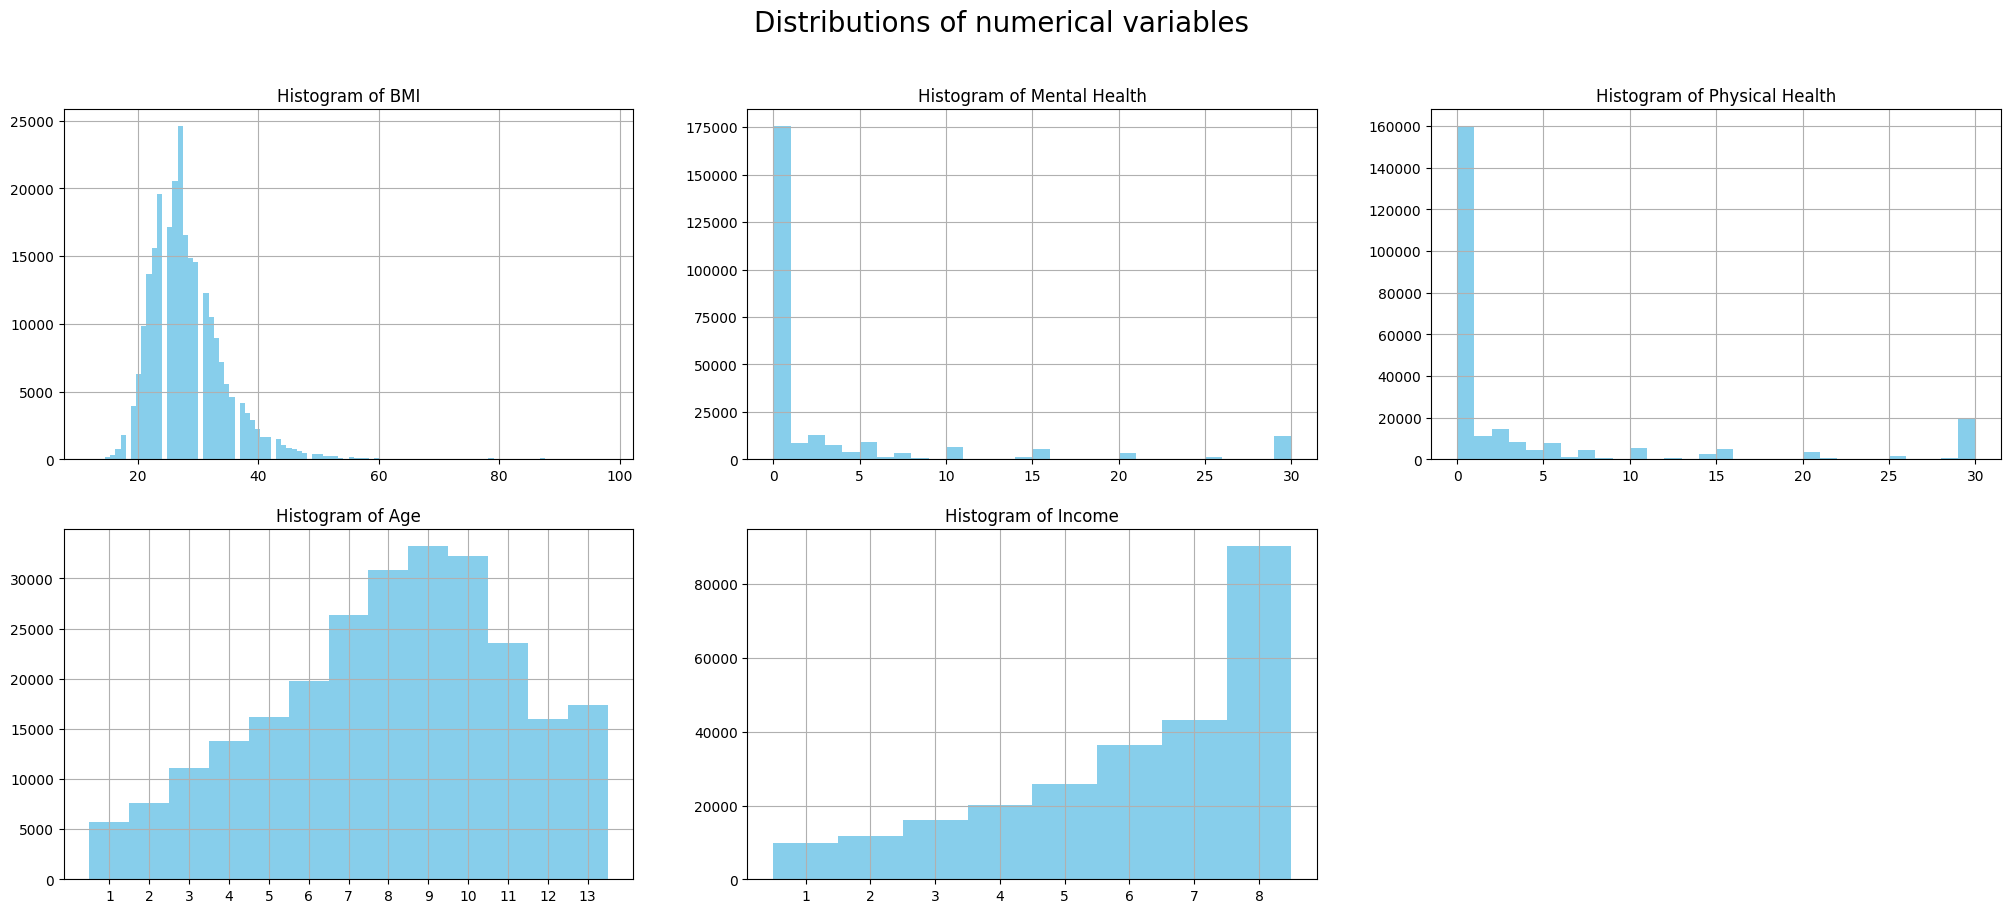

In [14]:
df_numerical = df[['BMI','MentHlth','PhysHlth','Age','Income']]

# Creation of subplots:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(25, 10))

# Flatten the axes array to a 1D array
axes = axes.flatten()#Converting the 2D array of axes objects into a 1D array.
                     #Useful when you want iterating over the subplots,
                     #regardless of whether there is one row or multiple rows.

# Remove empty subplot in row 2, column 3 because it is empty
fig.delaxes(axes[-1])

# Specifications for each subplot
# Subplot for BMI:
axes[0].hist(df_numerical['BMI'], bins=100, color='skyblue')
axes[0].set_title('Histogram of BMI')
axes[0].grid(True)

# Subplot for MentHlth:
axes[1].hist(df_numerical['MentHlth'], bins=30, color='skyblue')
axes[1].set_title('Histogram of Mental Health')
axes[1].grid(True)

# Subplot for PhysHlth:
axes[2].hist(df_numerical['PhysHlth'], bins=30, color='skyblue')
axes[2].set_title('Histogram of Physical Health')
axes[2].grid(True)

# Subplot for Age:
axes[3].hist(df_numerical['Age'], bins=np.arange(0.5, 14, 1), color='skyblue')
axes[3].set_title('Histogram of Age')
axes[3].set_xticks(np.arange(1, 14, 1))  # Set custom xticks
axes[3].grid(True)

# Subplot for Income:
axes[4].hist(df_numerical['Income'], bins=np.arange(0.5, 9, 1), color='skyblue')
axes[4].set_title('Histogram of Income')
axes[4].grid(True)

# Adjust layout
# plt.tight_layout()
plt.suptitle("Distributions of numerical variables", fontsize=20)
plt.show()

#### CATEGORICAL FEATURES:
The rest of the variables in the dataset are categorical, having only a set of possible values. Within them, we find those which have only 2 possible values (0 or 1), *BI-CATEGORICAL VARIABLES*; and those which have more than 2 possible values, *MULTI-CATEGORICAL VARIABLES*.

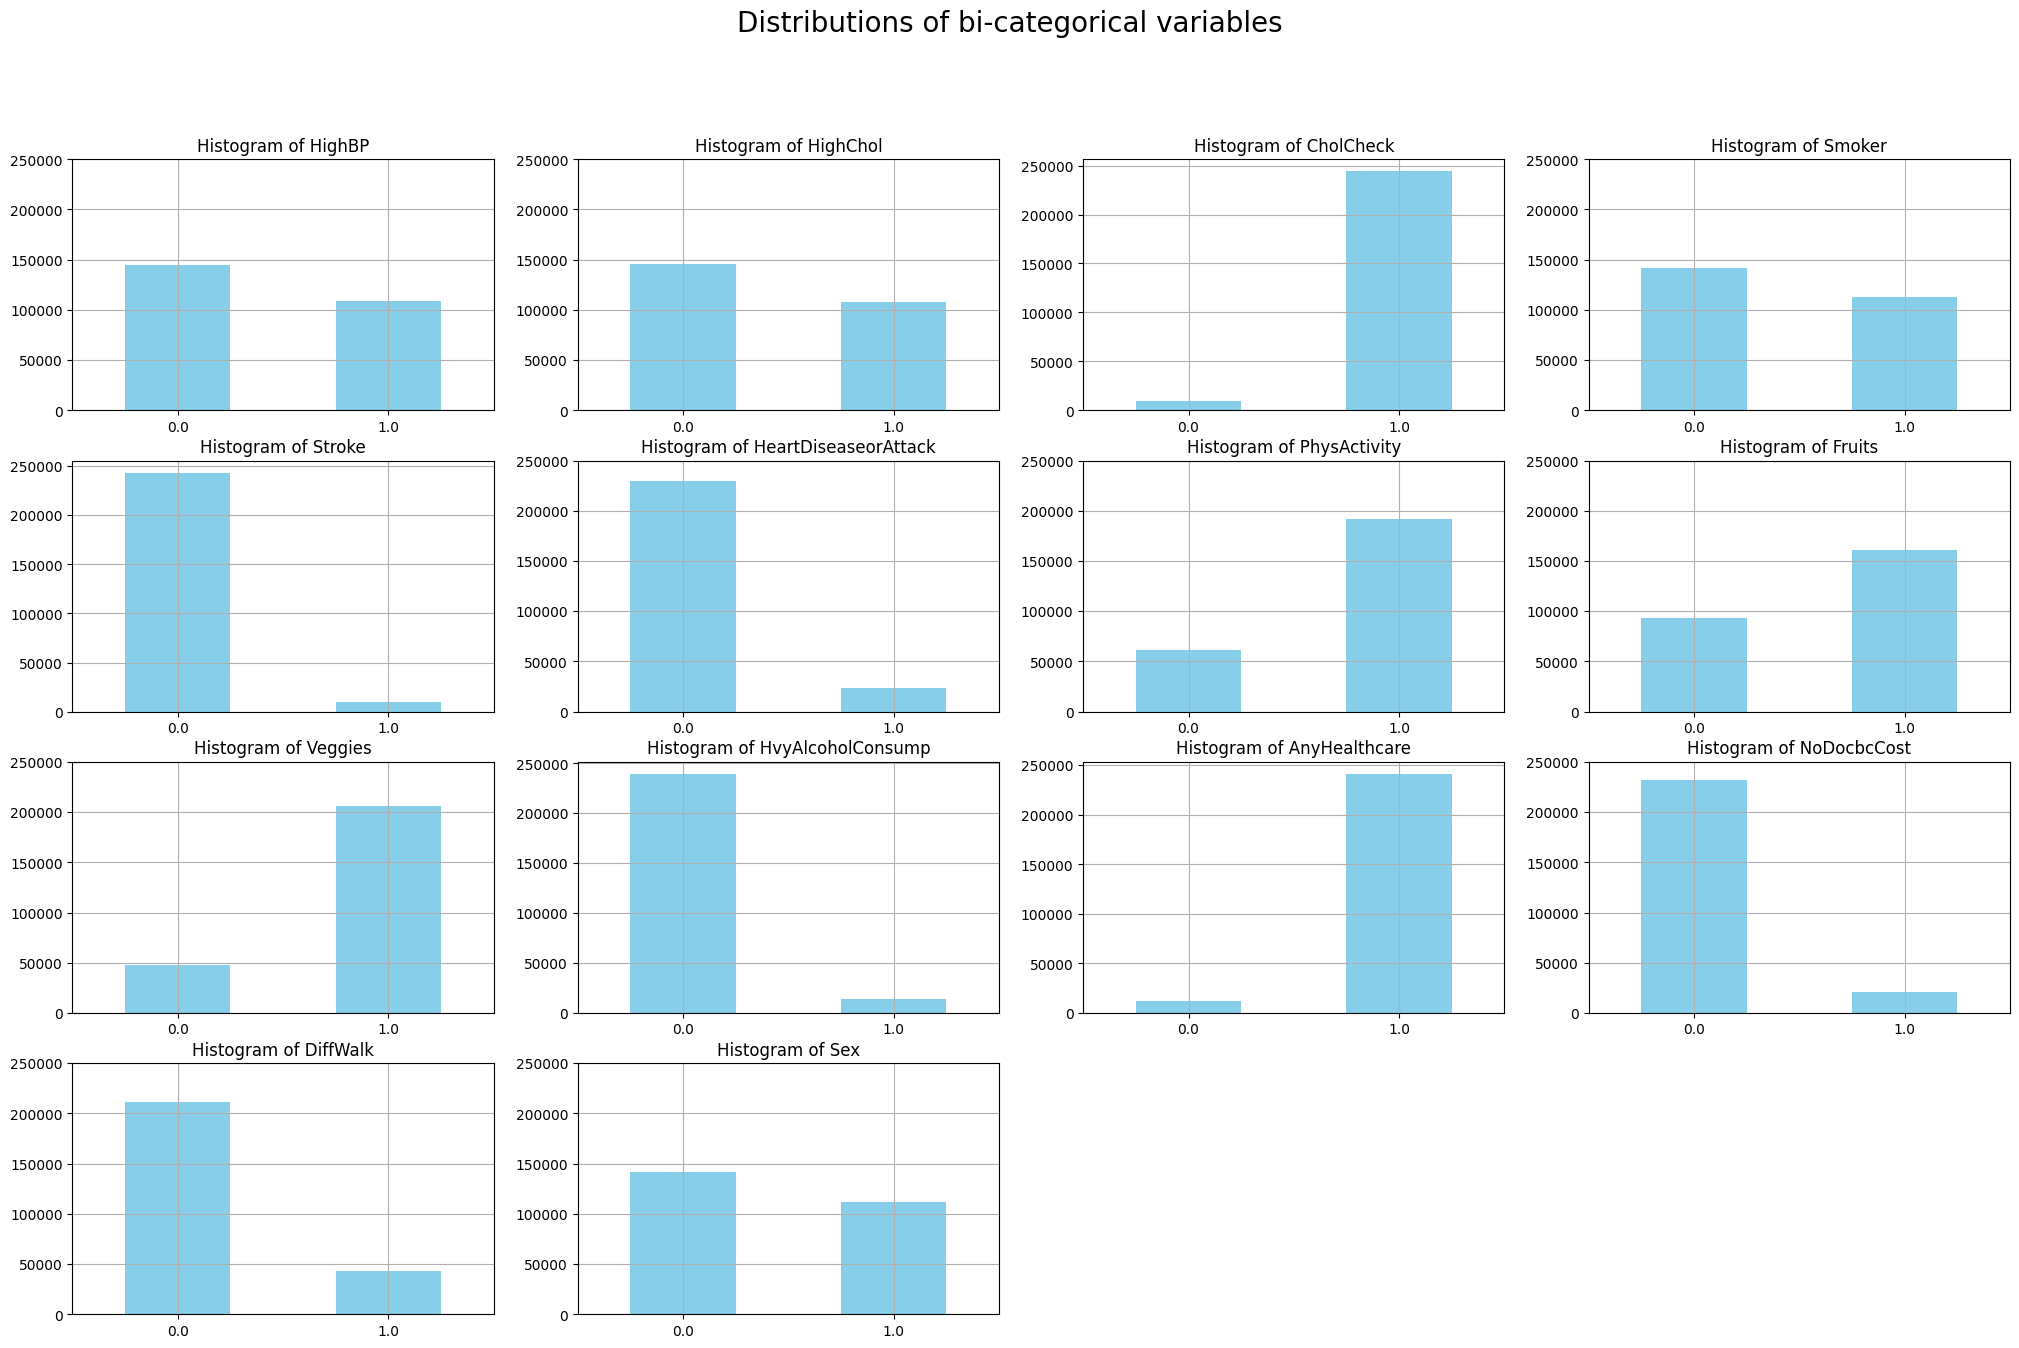

In [15]:
# BI-CATEGORICAL VARIABLES:
df_biCategorical = df[['HighBP','HighChol','CholCheck','Smoker','Stroke','HeartDiseaseorAttack','PhysActivity','Fruits','Veggies','HvyAlcoholConsump','AnyHealthcare','NoDocbcCost','DiffWalk','Sex']]

# Creation of subplots:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(25, 15)) #'axes' is an array with two elements, 2D.
                                                            # Each 'axes' object represents one subplot.

# Flatten the axes array to a 1D array
axes = axes.flatten()#Converting the 2D array of axes objects into a 1D array.
                     #Useful when you want iterating over the subplots,
                     #regardless of whether there is one row or multiple rows.

# Remove empty subplot in row 2, column 3 because it is empty
fig.delaxes(axes[-2])
fig.delaxes(axes[-1])

for i, feature in enumerate(df_biCategorical.columns):
    ax = axes[i]
    df_biCategorical[feature].value_counts().sort_index().plot(kind='bar', color='skyblue', ax=ax)
    ax.set_title(f'Histogram of {feature}')
    ax.set_xlabel('')
    # Rotate x-axis labels
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    ax.set_yticks(np.arange(0, 300000, 50000))
    ax.grid(True)

# Adjust layout
plt.suptitle("Distributions of bi-categorical variables", fontsize=20)
#plt.tight_layout()
plt.show()

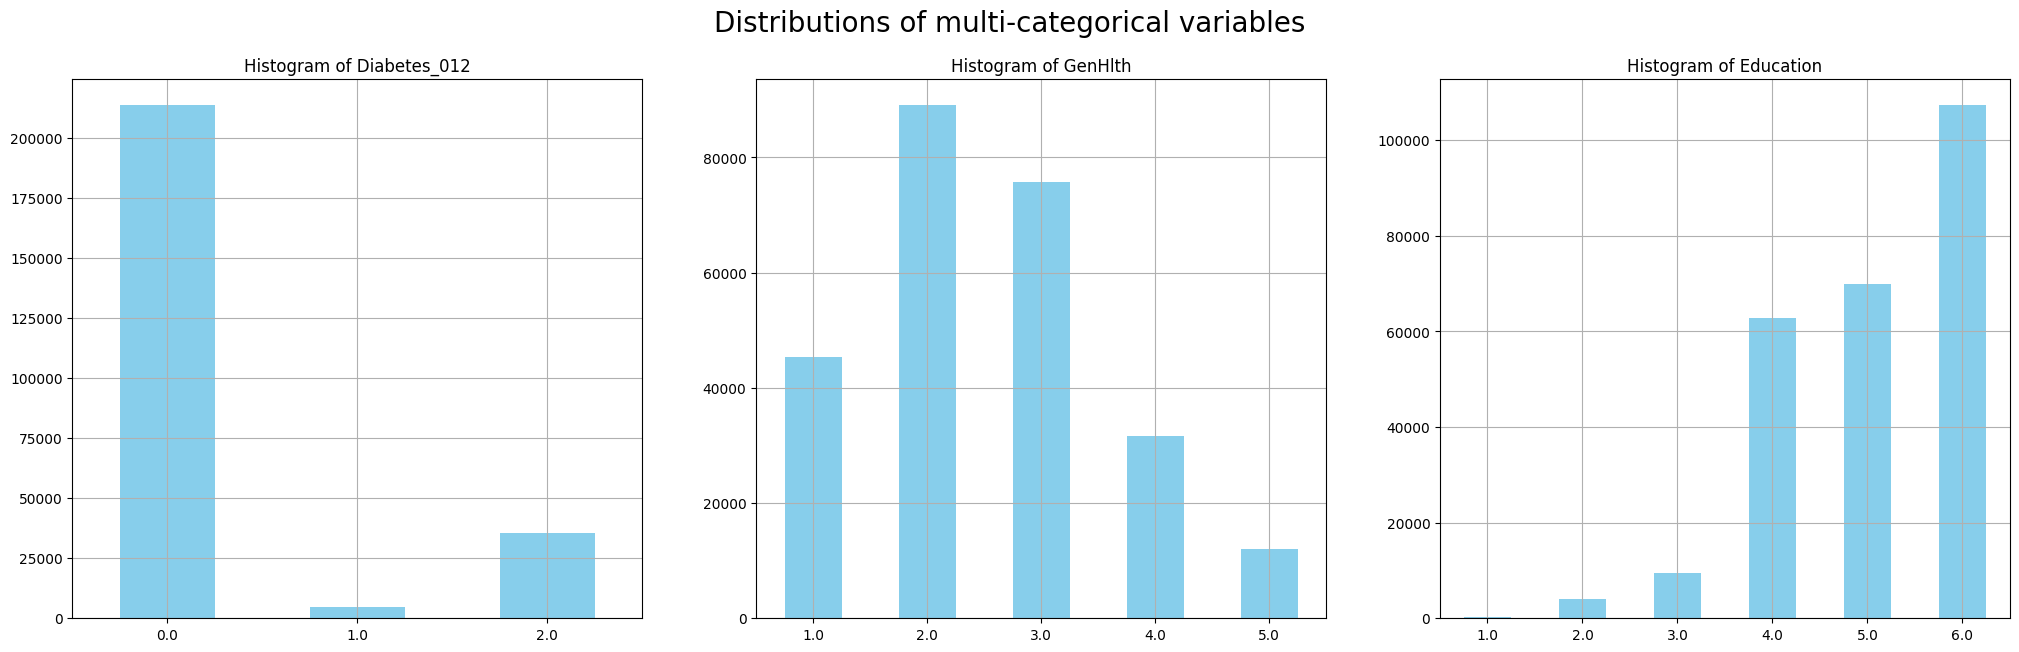

In [16]:
#MULTI-CATEGORICAL VARIABLES:
df_multiCategorical = df[['Diabetes_012','GenHlth','Education']]

# Creation of subplots:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 7)) #'axes' is an array with two elements, 2D.
                                                            # Each 'axes' object represents one subplot.

for i, feature in enumerate(df_multiCategorical.columns):
    ax = axes[i]
    df_multiCategorical[feature].value_counts().sort_index().plot(kind='bar', color='skyblue', ax=ax)
    ax.set_title(f'Histogram of {feature}')
    ax.set_xlabel('')
    # Rotate x-axis labels
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    ax.grid(True)

# Adjust layout
#plt.tight_layout()
plt.suptitle("Distributions of multi-categorical variables", fontsize=20)
plt.show()

Feature "Diabetes_012" will be considered as a target class. In this scenario, an imbalance can be observed. In order to tackle this, a data reduction through sampling must be applied.

### Outliers:
Feature "BMI" was studied in more depth to analyse the existence of outliers. As shown in the BoxPlot diagram, many values lie above the last quartile. Because

In [18]:
num_of_outliers = df_numerical['BMI'][df_numerical['BMI']>60].count()
total_data = df.shape[0]
percentage_of_outliers = (num_of_outliers/total_data) * 100
print(round(percentage_of_outliers, 2),"% of the total data are outliers regarding the feature 'BMI'.")

0.32 % of the total data are outliers regarding the feature 'BMI'.


In [36]:
type(df.loc[:,'Diabetes_012'].values.to_string)
#lA ultima figura:
# Hay que pasar los valores num de daibetes_012, a una string. (ahora están en array)
# a una string).
# Tener esos valore en una nueva columna anadida. Así cuando todo acabe, solo
# hay q eliminarlo.

numpy.ndarray

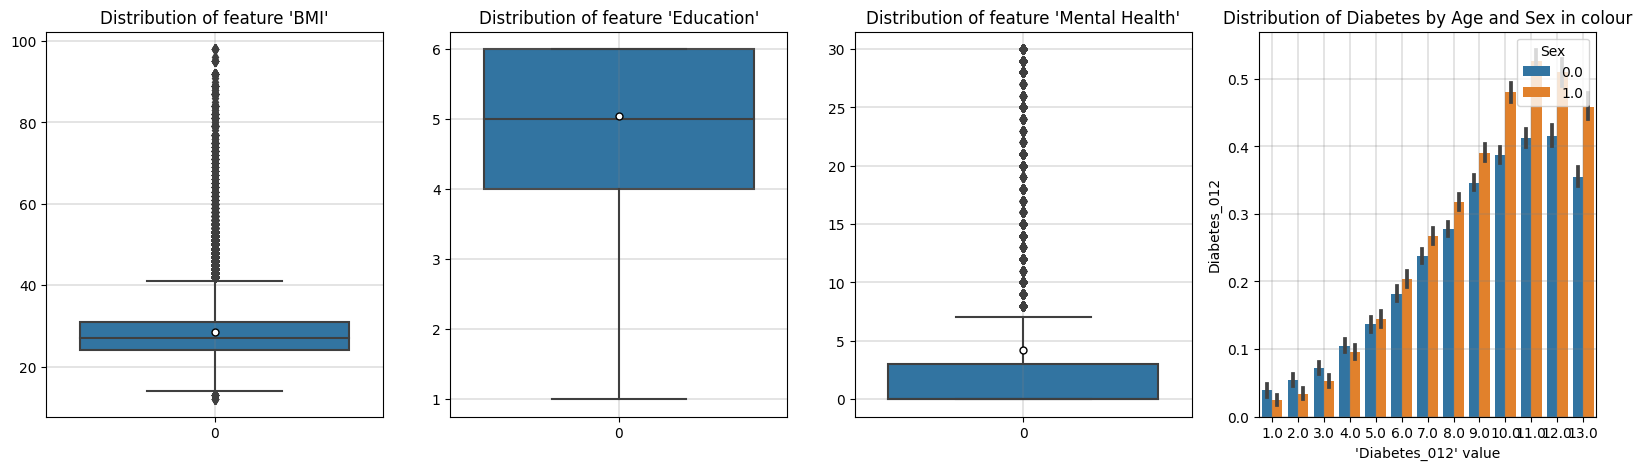

In [28]:
# Box plots of features with suspected outliers:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))

# BMI:
plt.subplot(1,4,1)
sb.boxplot(df_numerical['BMI'],
           showmeans = True,
           meanprops={"marker":"o",
                      "markerfacecolor":"white",
                       "markeredgecolor":"black",
                      "markersize":"5"}
                      )

plt.grid(color = "grey", linewidth = "0.3", linestyle = "-")
plt.title("Distribution of feature 'BMI'")

# Education:
plt.subplot(1,4,2)
sb.boxplot(df_multiCategorical['Education'],
           showmeans = True,
           meanprops={"marker":"o",
                      "markerfacecolor":"white",
                       "markeredgecolor":"black",
                      "markersize":"5"}
                      )

plt.grid(color = "grey", linewidth = "0.3", linestyle = "-")
plt.title("Distribution of feature 'Education'")

# Physical Health:
plt.subplot(1,4,3)
sb.boxplot(df_numerical['PhysHlth'],
           showmeans = True,
           meanprops={"marker":"o",
                      "markerfacecolor":"white",
                       "markeredgecolor":"black",
                      "markersize":"5"}
                      )

plt.grid(color = "grey", linewidth = "0.3", linestyle = "-")
plt.title("Distribution of feature 'Mental Health'")

# Age
plt.subplot(1,4,4)
bplot = sb.barplot(data=df,
            x="Age",
            y="Diabetes_012",
            hue="Sex"
            )
plt.title("Distribution of Diabetes by Age and Sex in colour")
plt.xlabel("'Diabetes_012' value")
plt.grid(color = "grey", linewidth = "0.3", linestyle = "-")
# add legend and set position to upper right
plt.legend(title="Sex", loc='upper right');

Text(0.5, 1.0, "Distribution of feature 'Education'")

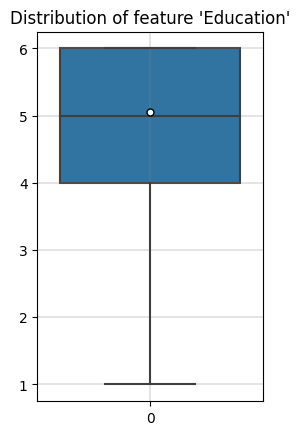

## Data reduction

### Removing duplicates in rows:

In [ ]:
orignialRows_df = df.copy()
df = df.drop_duplicates()
df.describe()


In [ ]:
orignialRows_df.describe()

In [ ]:
num_of_outliers = df_numerical['BMI'][df_numerical['BMI']>40].count()
total_data = df.shape[0]
percentage_of_outliers = (num_of_outliers/total_data) * 100
print(round(percentage_of_outliers, 2),"% of the total data are outliers regarding the feature 'BMI'.")

In [ ]:
# plt.figure(figsize = (5,7))
# sb.boxplot(df_numerical['BMI'],
#            showmeans = True,
#            meanprops={"marker":"o",
#                       "markerfacecolor":"white",
#                        "markeredgecolor":"black",
#                       "markersize":"5"}
#                       )

# plt.grid(color = "grey", linewidth = "0.3", linestyle = "-")
# plt.title("Distribution of feature 'BMI'")

### Removing uncorrelated features:  

In [ ]:
def chooseNoCorrFeatures(corr_treshold, *dataframes):
    """
    Returns a list of features from the datframe,
    that correlate with the rest with values below
    the treshold.
    Parameters:
    > *dataframe: various Dataframes to apply the function
    > corr_treshold: float of maximum correlation
    """
    list_of_feat = []
    for dataframe in dataframes:
        # Ensure that the input is a DataFrame
        if not isinstance(dataframe, pd.DataFrame):
            raise ValueError("Input must be a pandas DataFrame")

        # Transformations to the correlation matrix:
        corr_values = dataframe.corr().abs()
        # Mask the diagonal elements
        np.fill_diagonal(corr_values.values, 0)

        # Choosing features with under a correlation treshold:
        features_noCorr = (corr_values <= corr_treshold).all(axis=1)
        arrayFeat = features_noCorr.index[features_noCorr]
        list_of_feat.extend(arrayFeat)

    return list_of_feat


In [ ]:
#Max correlation value of each feature in the dataframe
#df.corr().replace(1,np.nan).describe().iloc[-1,:]

In [ ]:
plt.figure(figsize=(15, 15))
sb.heatmap(df.corr(), annot=True, fmt='.2%', annot_kws={'size': 7})
plt.title('Heatmap of percentage of correlation between features in the Whole dataset', fontsize=14);

Function *chooseNoCorrFeatures* selects the features where correlation value with the rest features is under a certain treshold.
Applying it, we can exclude features that have litte relation with the rest of the of features.

In [ ]:
features_no_corr=chooseNoCorrFeatures(0.13, df)
features_no_corr

In [ ]:
df.drop(labels=features_no_corr, axis=1, inplace=True)
df.shape

### Removing irrelevant features:
STRATEGY: Low correlated features to "Diabetes_012" will be selected. Before deleting them, their relation to other features will be checked, in order to confirm if another variable can account for their effect in Diabetes diagnosis.

#### First study:
The features that correlate with "Diabetes_012" with values \<0.1 are selected.

In [ ]:
# Features with correlation with "Diabetes_012" < 0.1
no_corr_diabetes = df.columns[(df.corr()["Diabetes_012"]<0.1)]
no_corr_diabetes

A closer analysis of this features is conducted, selecting for each of them the attribute with most correlation.<br>

In [ ]:
# Max correlation value of this features in the whole dataframe
max_values_ncd = df.corr().replace(1,np.nan).abs().describe().loc['max', no_corr_diabetes]

In [ ]:
# Attributes to which they correlate the most.
intermediate_correlations=[]
for feature in max_values_ncd.index:
    name = df.columns[df.corr().abs()[feature]==max_values_ncd[feature]].tolist() # for every index in max_values_ncd,
    intermediate_correlations.append(name[0])                                     # find the column name where value
                                                                                  # matches the value in max_values_ncd
    print(feature," is most correlated to ", name[0])

It is observed that many of the attributes related to non-influencing-diabetes features, do have some significant effect in other features very related to diabetes. In other words, indirectly, this apparently low-correlated features have an impact on the Diabetes diagnosis through *intermediate* features. They are features that may connect the effect of the low-correlated-variables to 'Diabetes_012'

In [ ]:
intermediate_corr = list(set(intermediate_correlations))
print("List of 'intermediate' features in the effect of low-correlated-features to 'Diabetes_012':\n", intermediate_corr)

In [ ]:
# HEATMAP THAT SHOWS THE CORRELATION OF THE INTERMEDIATE FEATURES TO 'Diabetes_012'
intermediate_corr.append("Diabetes_012")
plt.figure(figsize=(7, 7))
sb.heatmap(df[intermediate_corr].corr(), annot=True, fmt='.2%', annot_kws={'size': 7})
plt.title('Heatmap of percentage of correlation between "intermediate" features and "Diabetes_012"', fontsize=14);

Studying this heatmap of the "intermediate" features, it is clear that the feature **"GenHlth" accounts for the most meaningful impact on the diagnosis for Diabetes**, with a correlation of 28.49%. <br>
But also, it can be seen that **"GenHlth" correlates with most of the intermediate features**: "PhysHlth", "Income", "Education", "NoDocbcCost"...

Below, the correlation of the top 5 influencing features in Diabetes (excluding 'GenHlth'), and their correlation to 'GenHlth'. This shows to what extent factors for Diabetes are grouped by variable 'GenHlth'

In [ ]:
# Top 5 diabetes-correlating features:
# Because "GenHlth" is the top feature correlated with 'Diabetes_012', first
# top 6 features are extracted. Then 'GenHlth' is removed.
top5_features_cd_series = df.corr()['Diabetes_012'].replace(1,np.nan).abs().sort_values(ascending=False).head(6)
top5_features_cd = (top5_features_cd_series.index).tolist()
#(top5_features_cd).remove('GenHlth')

# Correlation of Top 5 diabetes-correlating features with "GenHlth"
max_values_cgh = df[top5_features_cd].corr()['GenHlth'].replace(1,np.nan).abs().sort_values(ascending=False).head(5)
print("List of the correlation between the top 5 diabetes-correlating features and 'GenHlth':\n ", max_values_cgh )

Therefore, **"GenHlth"** groups the effect of a high number of other features, masking their individual effect on "Diabetes_012". Additionally, the feature is too general, and collects a subjective assessment. Because of this, it is concluded that it will be deleted.

In [ ]:
# # HEATMAP THAT SHOWS THE CORRELATION OF THE 'INTERMEDIATE FEATURES' AND "GenHlth"
# no_corr_diabetes= (no_corr_diabetes).tolist()
# no_corr_diabetes.append("GenHlth")
# plt.figure(figsize=(7, 7))
# sb.heatmap(df[no_corr_diabetes].corr(), annot=True, fmt='.2%', annot_kws={'size': 7})
# plt.title('Correlation between least-related to Diabetes features and "GenHlth"', fontsize=14);

In [ ]:
df.drop("GenHlth", axis=1, inplace=True)
df.shape

Now that "GenHlth" has been removed, the redundancy of variables can be better studied.

#### Second study:
Once the screen effect of "GenHlth" has been removed, variables with no correlation with "Diabetes_012" will be analised again, following the same strategy:
- Check whether they have a significant correlation wiht another features.
- Determine if this relation to other variables makes them redundant.

In [ ]:
# POORLY CORRELATED FEATURES: Features with correlation with "Diabetes_012" < 0.1
no_corr_diabetes = df.columns[(df.corr()["Diabetes_012"]<0.1)]

# Max correlation value of this features in the whole dataframe
max_values_ncd = df.corr().replace(1,np.nan).abs().describe().loc['max', no_corr_diabetes]

# INTERMEDIATE FEATURES: Attributes to which they correlate the most.
intermediate_correlations=[]
for feature in max_values_ncd.index:
    name = df.columns[df.corr().abs()[feature]==max_values_ncd[feature]].tolist() # for every index in max_values_ncd,
    intermediate_correlations.append(name[0])                                     # find the column name where value
                                                                                  # matches the value in max_values_ncd
    print(feature," is most correlated to ", name[0])



In [ ]:
# List of the most correlated variables with low-diabetes-correlation features
intermediate_corr = list(set(intermediate_correlations))

# HEATMAP THAT SHOWS THE CORRELATION OF THE INTERMEDIATE FEATURES TO 'Diabetes_012'
intermediate_corr.append("Diabetes_012")
plt.figure(figsize=(7, 7))
sb.heatmap(df[intermediate_corr].corr(), annot=True, fmt='.2%', annot_kws={'size': 7})
plt.title('Heatmap of percentage of correlation between "intermediate" features and "Diabetes_012"', fontsize=14);

In [ ]:
# # HEATMAP THAT SHOWS THE CORRELATION OF THE INTERMEDIATE FEATURES TO 'Diabetes_012'
# no_corr_diabetes= (no_corr_diabetes).tolist()
# no_corr_diabetes.append("GenHlth")
# plt.figure(figsize=(7, 7))
# sb.heatmap(df[no_corr_diabetes].corr(), annot=True, fmt='.2%', annot_kws={'size': 7})
# plt.title('Correlation between least-related to Diabetes features and "GenHlth"', fontsize=14);

Looks like PhysHlth is a variable that also groups many others...
I am going to stop "wasting" time reducint number of features manually...

## Transformation of data

### Resampling to deal with imbalance.
For an imbalanced class dataset F1 score is a more appropriate metric. After checking it, i will oversample...
https://www.analyticsvidhya.com/blog/2021/06/5-techniques-to-handle-imbalanced-data-for-a-classification-problem/#h-what-is-imbalanced-data-and-how-to-handle-it

In [ ]:
n_diabetes_0 = (df['Diabetes_012']==0).sum()
n_diabetes_1 = (df['Diabetes_012']==1).sum()
n_diabetes_2 = (df['Diabetes_012']==2).sum()
print("Number of data with NO diabetes: ", n_diabetes_0)
print("Number of data with PRE diabetes: ", n_diabetes_1)
print("Number of data with diabetes: ", n_diabetes_2)

In [ ]:
#create different dataframes of majority and minority classes
df_diab0 = df[(df['Diabetes_012']==0)]
df_diab1 = df[(df['Diabetes_012']==1)]
df_diab2 = df[(df['Diabetes_012']==2)]

Undersampling to match the number of diabetic and non diabetic data to the number of prediabetic data:

In [ ]:
# Undersample NON diabetes class
df_diab0_undersampled = resample(df_diab0,
                                 replace=False,            # sample with replacement
                                 n_samples= n_diabetes_1,  # to match majority class
                                 random_state=42)          # reproducible results

# Undersample Diabetes class
df_diab2_undersampled = resample(df_diab2,
                                 replace=False,            # sample with replacement
                                 n_samples= n_diabetes_1,  # to match majority class
                                 random_state=42)          # reproducible results

# Combine majority class with upsampled minority class
df_diab1sampled = pd.concat([df_diab0_undersampled, df_diab1, df_diab2_undersampled])

In [ ]:
df_diab1sampled.shape

Matching the number of NON diabetic and prediabetic data to the number of diabetic data:
(This involves undersampling of Non diabetic class, and upsampling of prediabetic class)

In [ ]:
# Undersample NON diabetes class
df_diab0_undersampled = resample(df_diab0,
                                 replace=False,     # sample with replacement
                                 n_samples= n_diabetes_2,  # to match majority class
                                 random_state=42)   # reproducible results

# # Undersample Pre-diebetes class
# df_diab1_upsampled = resample(df_diab1,
#                               replace=True,             # sample with replacement
#                               n_samples= n_diabetes_2,  # to match majority class
#                               random_state=42)          # reproducible results

# Oversample class Pre-diabetes
smote = SMOTE(sampling_strategy={1: n_diabetes_2})
df_with_diab1_oversampled, _ = smote.fit_resample(df, df['Diabetes_012'])
df_diab1_oversampled = df_with_diab1_oversampled[(df_with_diab1_oversampled['Diabetes_012']==1)]

# Combine majority class with upsampled minority class
df_diab2sampled = pd.concat([df_diab0_undersampled, df_diab1_oversampled, df_diab2])

# Modelling

## For number of data as the smallest class: prediabetes
Using df_diab1sampled, where all classes of 'Diabetes_012' have the size of class prediabetes (1).

In [ ]:
# Divide dataset in data and labels.
X = df_diab1sampled.drop('Diabetes_012', axis=1, inplace=False)
y = df_diab1sampled['Diabetes_012']

### Using PCA for the dimension reduction:

In [ ]:
# Use components such that 95% of varience is retained.
pca = PCA(0.95)
X_pca = pca.fit_transform(X)
X_pca.shape

In [ ]:
# Create training and test sets.
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=30)

In [ ]:
# Initialize the classifier
nb_classifier = GaussianNB()
dt_classifier = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
nb_classifier.fit(X_train, y_train)
dt_classifier.fit(X_train, y_train)

In [ ]:
# Predictions on the test set
y_predNB = nb_classifier.predict(X_test)
y_predDT = dt_classifier.predict(X_test)

# Evaluate accuracy
# Print classification report and confusion matrix
# Calculate and print the F1 score
print("GAUSSIAN NAIVE BAYES CLASSIFIER:")
accuracyNB = accuracy_score(y_test, y_predNB)
print(f"Accuracy for Gaussian Naive-Bayes Classifier: {accuracyNB}")
print("Guassian Naive-Bayes Classifier: ")
print(classification_report(y_test, y_predNB))
f1NB = f1_score(y_test, y_predNB, average='weighted')
print(f"F1 Score for Gaussian Naive-Bayes Classifier: {f1NB}")

print("\nDECISION TREE CLASSIFIER:")
accuracyDT = accuracy_score(y_test, y_predDT)
print(f"Accuracy for Decision Tree Classifier: {accuracyDT}")
print("Decision Tree Classifier: ")
print(classification_report(y_test, y_predDT))
f1DT = f1_score(y_test, y_predDT, average='weighted')
print(f"F1 Score for Decision Tree Classifier: {f1DT}")
#print(confusion_matrix(y_test, y_pred))

#### Adding cross validation:

In [ ]:
# Number of folds for cross-validation
num_folds = 7
# Specific cross-validation strategy (StratifiedKFold: similar to K-fold but mantaining proportions)
cv_strategy_gaussianNB = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)
cv_strategy_decisionTree = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)
# Perform cross-validation
cv_scores_gaussianNB = cross_val_score(nb_classifier, X_pca, y, cv=cv_strategy_gaussianNB, scoring='f1_weighted')
cv_scores_decisionTree = cross_val_score(dt_classifier, X_pca, y, cv=cv_strategy_decisionTree, scoring='f1_weighted')

# Print the cross-validation scores
# Print the mean and standard deviation of the cross-validation scores
print("GAUSSIAN NAIVE BAYES CLASSIFIER:")
print("Cross-Validation Scores: ", cv_scores_gaussianNB)
print("Mean F1 Score for Gaussian Naive Bayes Classifier:", cv_scores_gaussianNB.mean())

print("DECISION TREE CLASSIFIER:")
print("Cross-Validation Scores: ", cv_scores_gaussianNB)
print("Mean F1 Score for Decision Tree Classifier:", cv_scores_decisionTree.mean())

### Without using PCA for the dimension reduction:

In [ ]:
# Create training and test sets, without applying the PCA reduction.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [ ]:
# Initialize the classifier
nb_classifier = GaussianNB()
dt_classifier = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
nb_classifier.fit(X_train, y_train)
dt_classifier.fit(X_train, y_train)

In [ ]:
# Predictions on the test set
y_predNB = nb_classifier.predict(X_test)
y_predDT = dt_classifier.predict(X_test)

# Evaluate accuracy
# Print classification report and confusion matrix
# Calculate and print the F1 score
print("GAUSSIAN NAIVE BAYES CLASSIFIER:")
accuracyNB = accuracy_score(y_test, y_predNB)
print(f"Accuracy for Gaussian Naive-Bayes Classifier: {accuracyNB}")
print("Guassian Naive-Bayes Classifier: ")
print(classification_report(y_test, y_predNB))
f1NB = f1_score(y_test, y_predNB, average='weighted')
print(f"F1 Score for Gaussian Naive-Bayes Classifier: {f1NB}")

print("\nDECISION TREE CLASSIFIER:")
accuracyDT = accuracy_score(y_test, y_predDT)
print(f"Accuracy for Decision Tree Classifier: {accuracyDT}")
print("Decision Tree Classifier: ")
print(classification_report(y_test, y_predDT))
f1DT = f1_score(y_test, y_predDT, average='weighted')
print(f"F1 Score for Decision Tree Classifier: {f1DT}")
#print(confusion_matrix(y_test, y_pred))

#### Adding cross validation:

In [ ]:
# Number of folds for cross-validation
num_folds = 7
# Specific cross-validation strategy (StratifiedKFold: similar to K-fold but mantaining proportions)
cv_strategy_gaussianNB = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)
cv_strategy_decisionTree = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)
# Perform cross-validation
cv_scores_gaussianNB = cross_val_score(nb_classifier, X, y, cv=cv_strategy_gaussianNB, scoring='f1_weighted')
cv_scores_decisionTree = cross_val_score(dt_classifier, X, y, cv=cv_strategy_decisionTree, scoring='f1_weighted')

# Print the cross-validation scores
# Print the mean and standard deviation of the cross-validation scores
print("GAUSSIAN NAIVE BAYES CLASSIFIER:")
print("Cross-Validation Scores: ", cv_scores_gaussianNB)
print("Mean F1 Score for Gaussian Naive Bayes Classifier:", cv_scores_gaussianNB.mean())

print("DECISION TREE CLASSIFIER:")
print("Cross-Validation Scores: ", cv_scores_gaussianNB)
print("Mean F1 Score for Decision Tree Classifier:", cv_scores_decisionTree.mean())

## For number of data as the middle class: diabetes
Using df_diab1sampled, where all classes of 'Diabetes_012' have the size of class diabetes (2).

In [ ]:
# Divide dataset in data and labels.
X = df_diab2sampled.drop('Diabetes_012', axis=1, inplace=False)
y = df_diab2sampled['Diabetes_012']

### Using PCA for the dimension reduction:

In [ ]:
# Use components such that 95% of varience is retained.
pca = PCA(0.95)
X_pca = pca.fit_transform(X)
X_pca.shape

In [ ]:
# Create training and test sets.
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=30)

In [ ]:
# Initialize the classifier
nb_classifier = GaussianNB()
dt_classifier = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
nb_classifier.fit(X_train, y_train)
dt_classifier.fit(X_train, y_train)

In [ ]:
# Predictions on the test set
y_predNB = nb_classifier.predict(X_test)
y_predDT = dt_classifier.predict(X_test)

# Evaluate accuracy
# Print classification report and confusion matrix
# Calculate and print the F1 score
print("GAUSSIAN NAIVE BAYES CLASSIFIER:")
accuracyNB = accuracy_score(y_test, y_predNB)
print(f"Accuracy for Gaussian Naive-Bayes Classifier: {accuracyNB}")
print("Guassian Naive-Bayes Classifier: ")
print(classification_report(y_test, y_predNB))
f1NB = f1_score(y_test, y_predNB, average='weighted')
print(f"F1 Score for Gaussian Naive-Bayes Classifier: {f1NB}")

print("\nDECISION TREE CLASSIFIER:")
accuracyDT = accuracy_score(y_test, y_predDT)
print(f"Accuracy for Decision Tree Classifier: {accuracyDT}")
print("Decision Tree Classifier: ")
print(classification_report(y_test, y_predDT))
f1DT = f1_score(y_test, y_predDT, average='weighted')
print(f"F1 Score for Decision Tree Classifier: {f1DT}")
#print(confusion_matrix(y_test, y_pred))

#### Adding cross validation:

In [ ]:
# Number of folds for cross-validation
num_folds = 7
# Specific cross-validation strategy (StratifiedKFold: similar to K-fold but mantaining proportions)
cv_strategy_gaussianNB = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)
cv_strategy_decisionTree = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)
# Perform cross-validation
cv_scores_gaussianNB = cross_val_score(nb_classifier, X_pca, y, cv=cv_strategy_gaussianNB, scoring='f1_weighted')
cv_scores_decisionTree = cross_val_score(dt_classifier, X_pca, y, cv=cv_strategy_decisionTree, scoring='f1_weighted')

# Print the cross-validation scores
# Print the mean and standard deviation of the cross-validation scores
print("GAUSSIAN NAIVE BAYES CLASSIFIER:")
print("Cross-Validation Scores: ", cv_scores_gaussianNB)
print("Mean F1 Score for Gaussian Naive Bayes Classifier:", cv_scores_gaussianNB.mean())

print("\nDECISION TREE CLASSIFIER:")
print("Cross-Validation Scores: ", cv_scores_gaussianNB)
print("Mean F1 Score for Decision Tree Classifier:", cv_scores_decisionTree.mean())

### Without using PCA for the dimension reduction:

In [ ]:
# Create training and test sets, without applying the PCA reduction.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [ ]:
# Initialize the classifier
nb_classifier = GaussianNB()
dt_classifier = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
nb_classifier.fit(X_train, y_train)
dt_classifier.fit(X_train, y_train)

In [ ]:
# Predictions on the test set
y_predNB = nb_classifier.predict(X_test)
y_predDT = dt_classifier.predict(X_test)

# Evaluate accuracy
# Print classification report and confusion matrix
# Calculate and print the F1 score
print("GAUSSIAN NAIVE BAYES CLASSIFIER:")
accuracyNB = accuracy_score(y_test, y_predNB)
print(f"Accuracy for Gaussian Naive-Bayes Classifier: {accuracyNB}")
print("Guassian Naive-Bayes Classifier: ")
print(classification_report(y_test, y_predNB))
f1NB = f1_score(y_test, y_predNB, average='weighted')
print(f"F1 Score for Gaussian Naive-Bayes Classifier: {f1NB}")

print("\nDECISION TREE CLASSIFIER:")
accuracyDT = accuracy_score(y_test, y_predDT)
print(f"Accuracy for Decision Tree Classifier: {accuracyDT}")
print("Decision Tree Classifier: ")
print(classification_report(y_test, y_predDT))
f1DT = f1_score(y_test, y_predDT, average='weighted')
print(f"F1 Score for Decision Tree Classifier: {f1DT}")
#print(confusion_matrix(y_test, y_pred))

#### Adding cross validation:

In [ ]:
# Number of folds for cross-validation
num_folds = 7
# Specific cross-validation strategy (StratifiedKFold: similar to K-fold but mantaining proportions)
cv_strategy_gaussianNB = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)
cv_strategy_decisionTree = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)
# Perform cross-validation
cv_scores_gaussianNB = cross_val_score(nb_classifier, X, y, cv=cv_strategy_gaussianNB, scoring='f1_weighted')
cv_scores_decisionTree = cross_val_score(dt_classifier, X, y, cv=cv_strategy_decisionTree, scoring='f1_weighted')

# Print the cross-validation scores
# Print the mean and standard deviation of the cross-validation scores
print("GAUSSIAN NAIVE BAYES CLASSIFIER:")
print("Cross-Validation Scores: ", cv_scores_gaussianNB)
print("Mean F1 Score for Gaussian Naive Bayes Classifier:", cv_scores_gaussianNB.mean())

print("DECISION TREE CLASSIFIER:")
print("Cross-Validation Scores: ", cv_scores_gaussianNB)
print("Mean F1 Score for Decision Tree Classifier:", cv_scores_decisionTree.mean())